In [1]:
import argparse
import torch
import torch.nn as nn
import numpy as np
import os
import pickle
from data_loader import get_loader
from build_vocab import Vocabulary
from model import ClassiModel,ImCNN,CapCNN
from torchvision import transforms
from torchnet import meter
from sklearn.metrics import confusion_matrix,precision_recall_curve,precision_score,recall_score,f1_score

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ])

In [4]:
with open('vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)

In [ ]:
meter.ConfusionMeter()

In [10]:
test_dataloader = get_loader('/media/theo/data/MVSO/images/resized_test/','/home/theo/Xli/test.json',vocab,
                            transform, 1,shuffle=False, num_workers=6)

In [12]:
pos_pos = 0
pos_neg = 0
neg_neg = 0
neg_pos = 0

In [13]:
predicts = []
true_label = []

In [6]:
len(test_dataloader)

919

In [7]:
for ii, (images,captions,targets) in enumerate(test_dataloader):
    if ii >1:
        break
    print(images,captions)

tensor([[[[-0.0902, -0.0902, -0.0902,  ..., -0.5922, -0.8353, -0.9765],
          [-0.0902, -0.0902, -0.0902,  ..., -0.5922, -0.8353, -0.9765],
          [-0.0902, -0.0980, -0.0980,  ..., -0.5922, -0.8353, -0.9765],
          ...,
          [-0.8980, -0.8980, -0.9059,  ..., -0.7490, -0.8588, -0.9765],
          [-0.9059, -0.9059, -0.9059,  ..., -0.7412, -0.8588, -0.9765],
          [-0.9059, -0.9059, -0.9059,  ..., -0.7176, -0.8196, -0.9765]],

         [[-0.1216, -0.1216, -0.1216,  ..., -0.6157, -0.8588, -1.0000],
          [-0.1216, -0.1216, -0.1216,  ..., -0.6157, -0.8588, -1.0000],
          [-0.1216, -0.1294, -0.1294,  ..., -0.6157, -0.8588, -1.0000],
          ...,
          [-0.9137, -0.9137, -0.9216,  ..., -0.7569, -0.8902, -1.0000],
          [-0.9294, -0.9294, -0.9294,  ..., -0.7490, -0.8902, -1.0000],
          [-0.9294, -0.9294, -0.9294,  ..., -0.7255, -0.8510, -1.0000]],

         [[-0.2078, -0.2078, -0.2078,  ..., -0.6863, -0.9294, -1.0000],
          [-0.2078, -0.2078, -

tensor([[[[-0.8902, -0.8902, -0.8902,  ..., -0.7569, -0.7569, -0.7490],
          [-0.8980, -0.8980, -0.8902,  ..., -0.7647, -0.7569, -0.7490],
          [-0.9137, -0.9059, -0.9059,  ..., -0.7333, -0.7255, -0.7412],
          ...,
          [-0.9137, -0.9059, -0.9059,  ..., -0.6863, -0.6784, -0.6784],
          [-0.9137, -0.9059, -0.8980,  ..., -0.6941, -0.6941, -0.7020],
          [-0.9137, -0.9059, -0.8980,  ..., -0.6784, -0.6863, -0.7098]],

         [[-0.7882, -0.7882, -0.7882,  ..., -0.8824, -0.8824, -0.8745],
          [-0.7961, -0.7961, -0.7882,  ..., -0.8902, -0.8824, -0.8745],
          [-0.8353, -0.8275, -0.8275,  ..., -0.8588, -0.8510, -0.8667],
          ...,
          [-0.9922, -0.9843, -0.9843,  ..., -0.8431, -0.8353, -0.8431],
          [-0.9922, -0.9843, -0.9765,  ..., -0.8510, -0.8588, -0.8667],
          [-0.9922, -0.9843, -0.9765,  ..., -0.8431, -0.8510, -0.8745]],

         [[-0.9922, -0.9922, -0.9922,  ..., -0.9843, -0.9843, -0.9765],
          [-1.0000, -1.0000, -

In [11]:
def test():
    im_encoder = ImCNN().to(device)
    tex_encoder = CapCNN(100,len(vocab)).to(device)
    classifier = ClassiModel(12256,2).to(device)
    
    im_encoder.load_state_dict(torch.load('./models/im_encoder-3-3000.ckpt'))
    tex_encoder.load_state_dict(torch.load('./models/tex_encoder-3-3000.ckpt'))
    classifier.load_state_dict(torch.load('./models/classifier-3-3000.ckpt'))
    
    for ii, (images,captions,targets) in enumerate(test_dataloader):
        
        images = images.to(device)
        captions = captions.to(device)
        targets =targets.to(device)

        im_features = im_encoder(images)
        cap_features = tex_encoder(captions)
        outputs = classifier(im_features, cap_features)
        
        results  = outputs.max(dim = 1)[1].detach().tolist()
        for result in results:
            predicts.append(result)
        for label in targets:
            true_label.append(label.item())
        
        if (ii+1) % 100 == 0:
            print('{}/{}'.format(ii,919))

In [14]:
test()

99/919
199/919
299/919
399/919
499/919
599/919
699/919
799/919
899/919
999/919
1099/919
1199/919
1299/919
1399/919
1499/919
1599/919
1699/919
1799/919
1899/919
1999/919
2099/919
2199/919
2299/919
2399/919
2499/919
2599/919
2699/919
2799/919
2899/919
2999/919
3099/919
3199/919
3299/919
3399/919
3499/919
3599/919
3699/919
3799/919
3899/919
3999/919
4099/919
4199/919
4299/919
4399/919
4499/919
4599/919
4699/919
4799/919
4899/919
4999/919
5099/919
5199/919
5299/919
5399/919
5499/919
5599/919
5699/919
5799/919
5899/919
5999/919
6099/919
6199/919
6299/919
6399/919
6499/919
6599/919
6699/919
6799/919
6899/919
6999/919
7099/919
7199/919
7299/919
7399/919
7499/919
7599/919
7699/919
7799/919
7899/919
7999/919
8099/919
8199/919
8299/919
8399/919
8499/919
8599/919
8699/919
8799/919
8899/919
8999/919
9099/919
9199/919
9299/919
9399/919
9499/919
9599/919
9699/919
9799/919
9899/919
9999/919
10099/919
10199/919
10299/919
10399/919
10499/919
10599/919
10699/919
10799/919
10899/919
10999/919
11099/919
1

83199/919
83299/919
83399/919
83499/919
83599/919
83699/919
83799/919
83899/919
83999/919
84099/919
84199/919
84299/919
84399/919
84499/919
84599/919
84699/919
84799/919
84899/919
84999/919
85099/919
85199/919
85299/919
85399/919
85499/919
85599/919
85699/919
85799/919
85899/919
85999/919
86099/919
86199/919
86299/919
86399/919
86499/919
86599/919
86699/919
86799/919
86899/919
86999/919
87099/919
87199/919
87299/919
87399/919
87499/919
87599/919
87699/919
87799/919
87899/919
87999/919
88099/919
88199/919
88299/919
88399/919
88499/919
88599/919
88699/919
88799/919
88899/919
88999/919
89099/919
89199/919
89299/919
89399/919
89499/919
89599/919
89699/919
89799/919
89899/919
89999/919
90099/919
90199/919
90299/919
90399/919
90499/919
90599/919
90699/919
90799/919
90899/919
90999/919
91099/919
91199/919
91299/919
91399/919
91499/919
91599/919
91699/919
91799/919
91899/919
91999/919
92099/919
92199/919
92299/919
92399/919
92499/919
92599/919
92699/919
92799/919
92899/919
92999/919
93099/919


In [38]:
len(true_label) / 3

128.0

In [54]:
pos = 0
for i in true_label:
    if i == 0:
        pos += 1
print(pos/len(true_label))

0.4913282014204908


In [49]:
confusion_matrix(predicts,true_label)

array([[40929,  7447],
       [16834, 52355]])

In [1]:
(40929+52355)/(40929+52355+7447+16834)

0.7934674435418705

In [50]:
precision_score(predicts, true_label)

0.8754723922276847

In [51]:
recall_score(predicts, true_label)

0.7566954284640622

In [52]:
f1_score(predicts, true_label)

0.8117620609189788

In [41]:
precision_recall_curve(predicts,true_label)

(array([0.60677083, 0.85863874, 1.        ]),
 array([1.        , 0.70386266, 0.        ]),
 array([0, 1]))

In [37]:
wrong_pos = []
for i in range(len(predicts)):
    if true_label[i] == 0 and predicts[i]==1:
        wrong_pos.append(i)

In [38]:
len(wrong_pos)

16834

In [39]:
wrong_pos[:10]

[3, 8, 11, 18, 23, 30, 45, 46, 47, 50]

In [16]:
#找出错的
import json
with open('/home/theo/Xli/test.json','r') as f:
    a = json.load(f)
    f.close()

In [21]:
b = [x for x in a.items()]

In [50]:
b[30]

('blank_book-554984507',
 {'caption': 'this is the very first item i sold on etsy',
  'image_path': 'blank_book-554984507.jpg',
  'target': 0})

In [24]:
from PIL import Image

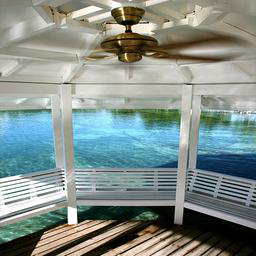

In [49]:
Image.open(os.path.join('/media/theo/data/MVSO/images/resized_test/','quiet_time-374327980.jpg'))